# STAT 315 - Final Project - Group 4
**Title:** Revenue Dynamics in Online Event Ticket Sales  
**Group Members:**  
- Jameel Muallim  
- Mohana Aljabri  
- Hesham Alshahrani  
**Date:** April 2025  

---

### Main Question:
> How is revenue generated across different event categories, cities, and ticket price ranges in the online event ticket sales market?

### Supporting Questions:
- Which event types and categories generate the highest total revenue?
- How do different ticket price ranges impact ticket sales volume?
- Which cities contribute the most to total ticket revenue?
- How does monthly revenue trend across different event categories?

### Motivation for Analysis:
Understanding how revenue dynamics vary across categories, pricing tiers, and locations provides critical insights for optimizing event pricing strategies, targeting marketing efforts, and improving revenue management for event organizers and ticketing companies.


## Step 0: Dataset Overview and Context

This project explores a multi-table dataset simulating online event ticket sales from the year **2008**. It supports detailed analysis of how ticket revenue varies by event type, pricing tier, and city. The dataset includes the following files:

- **`sales.csv`** – Records individual ticket transactions, including the total price paid and the number of tickets sold.
- **`listing.csv`** – Contains ticket listings with list ID, price per ticket, and the associated event.
- **`event.csv`** – Describes each event, including its name, event ID, and linked category.
- **`category.csv`** – Categorizes events by type (e.g., Pop, Musical, Sports) and broader category group.
- **`venue.csv`** – Lists venue information, including venue name, city, and venue ID.
- **`date.csv`** – Maps transactions to specific calendar dates using a date ID.
- **`users.csv`** – Contains user account data (not used in this analysis).
- **`ticket_prices.csv`** – Provides general ticket price information for market reference, not linked to specific sales.

Understanding the structure and relationships among these datasets was essential for designing the cleaning, merging, and analytical workflows used throughout this project.



## Step 1: Data Import and Initial Exploration

To begin our analysis, we imported the necessary Python libraries for data handling and visualization, including `pandas`, `numpy`, `matplotlib`, and `seaborn`.

We then loaded all relevant datasets into memory. To verify successful import and get a feel for each dataset's structure, we used `.head()` to preview the first few rows. This quick inspection allowed us to confirm that each file was read correctly and gave us a basic understanding of the available variables, their formats, and how different tables might be connected.

This initial step helped inform our plan for cleaning, merging, and preparing the data for analysis in the following stages.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


# Load datasets
ticket_prices = pd.read_csv('ticket_prices.csv')
venue = pd.read_csv('venue.csv')
users = pd.read_csv('users.csv')
sales = pd.read_csv('sales.csv')
listing = pd.read_csv('listing.csv')
event = pd.read_csv('event.csv')
date = pd.read_csv('date.csv')
category = pd.read_csv('category.csv')

# Quick inspection of datasets (only .head())
print("Ticket Prices")
display(ticket_prices.head())

print("\nVenue")
display(venue.head())

print("\nUsers")
display(users.head())

print("\nSales")
display(sales.head())

print("\nListing")
display(listing.head())

print("\nEvent")
display(event.head())

print("\nDate")
display(date.head())

print("\nCategory")
display(category.head())


Ticket Prices


,index,caldate,eventname,catgroup,priceperticket,qtysold
0,0,2008-11-02T00:00:00.000,Built To Spill,Concerts,96,291
1,1,2008-11-19T00:00:00.000,Spring Awakening,Shows,137,261
2,2,2008-12-12T00:00:00.000,All My Sons,Shows,208,249
3,3,2008-10-29T00:00:00.000,Phantom of the Opera,Shows,93,244
4,4,2008-04-26T00:00:00.000,Shakira,Concerts,193,219



Venue


,index,venueid,venuename,venuecity,venuestate,venueseats
0,0,2,Columbus Crew Stadium,Columbus,OH,0.0
1,1,4,CommunityAmerica Ballpark,Kansas City,KS,0.0
2,2,5,Gillette Stadium,Foxborough,MA,68756.0
3,3,7,BMO Field,Toronto,ON,0.0
4,4,9,Dick's Sporting Goods Park,Commerce City,CO,0.0



Users


,Unnamed: 0,userid,username,firstname,lastname,city,state,email,phone,likesports,liketheatre,likeconcerts,likejazz,likeclassical,likeopera,likerock,likevegas,likebroadway,likemusicals
0,0,2,PGL08LJI,Vladimir,Humphrey,Murfreesboro,SK,Suspendisse.tristique@nonnisiAenean.edu,(783) 492-1886,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,1.0
1,1,4,XDZ38RDD,Barry,Roy,Omaha,AB,sed@lacusUtnec.ca,(355) 452-8168,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,2,5,AEB55QTM,Reagan,Hodge,Forest Lake,NS,Cum@accumsan.com,(476) 519-9131,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0
3,3,7,OWY35QYB,Tamekah,Juarez,Moultrie,WV,elementum@semperpretiumneque.ca,(297) 875-7247,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,0.0,0.0
4,4,9,MSD36KVR,Mufutau,Watkins,Port Orford,MD,Integer.mollis.Integer@tristiquealiquet.org,(725) 719-7670,1.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,0.0,1.0



Sales


,Unnamed: 0,salesid,listid,sellerid,buyerid,eventid,dateid,qtysold,pricepaid,commission,saletime
0,0,33095,36572,30047,660,2903,1827,2,234.0,35.10,2008-01-01 09:41:06+00:00
1,1,88268,100813,45818,698,8649,1827,4,836.0,125.40,2008-01-01 07:26:20+00:00
2,2,150314,173969,48680,816,8762,1827,2,688.0,103.20,2008-01-01 03:50:02+00:00
3,3,110917,127048,37631,116,1749,1827,1,337.0,50.55,2008-01-01 07:05:02+00:00
4,4,157751,206999,3003,157,6605,1827,1,1730.0,259.50,2008-01-01 12:50:55+00:00



Listing


,Unnamed: 0,listid,sellerid,eventid,dateid,numtickets,priceperticket,totalprice,listtime
0,0,1315,37302,920,1827,9,126.0,1134.0,2008-01-01 04:05:41+00:00
1,1,724,35016,3468,1827,10,40.0,400.0,2008-01-01 03:32:37+00:00
2,2,1825,45077,3181,1827,16,118.0,1888.0,2008-01-01 01:16:37+00:00
3,3,7266,45195,7721,1827,2,91.0,182.0,2008-01-01 07:55:03+00:00
4,4,4118,40141,5624,1827,16,43.0,688.0,2008-01-01 03:10:06+00:00



Event


,index,eventid,venueid,catid,dateid,eventname,starttime
0,0,6649,6,9,1827,Hannah Montana,2008-01-01T19:30:00.000
1,1,1433,248,6,1827,Grease,2008-01-01T19:00:00.000
2,2,4135,16,9,1827,Nas,2008-01-01T14:30:00.000
3,3,5807,45,9,1827,Return To Forever,2008-01-01T15:00:00.000
4,4,1217,238,6,1827,Mamma Mia!,2008-01-01T20:00:00.000



Date


,index,dateid,caldate,day,week,month,qtr,year,holiday
0,0,1827,2008-01-01T00:00:00.000,WE,1,JAN,1,2008,True
1,1,1831,2008-01-05T00:00:00.000,SU,2,JAN,1,2008,False
2,2,1836,2008-01-10T00:00:00.000,FR,2,JAN,1,2008,False
3,3,1837,2008-01-11T00:00:00.000,SA,3,JAN,1,2008,False
4,4,1840,2008-01-14T00:00:00.000,TU,3,JAN,1,2008,False



Category


,index,catid,catgroup,catname,catdesc
0,0,1,Sports,MLB,Major League Baseball
1,1,3,Sports,NFL,National Football League
2,2,6,Shows,Musicals,Musical theatre
3,3,8,Shows,Opera,All opera and light opera
4,4,11,Concerts,Classical,"All symphony, concerto, and choir concerts"


## Step 2: Data Cleaning

Next, we conducted a comprehensive cleaning process across all eight datasets to ensure data quality and consistency before merging.

In the `sales` table, we removed rows where either `pricepaid` or `qtysold` were missing or had non-positive values. This filtering step ensured that only valid transaction records remained. Similarly, entries in `listing` with missing or zero `priceperticket` values were excluded to maintain price accuracy.

The `event`, `category`, and `venue` datasets had missing values in critical fields such as `eventname`, `catgroup`, and `venuecity`. Since these features were essential for identifying and grouping events, we addressed the issue by dropping incomplete rows.

For the remaining datasets—`ticket_prices`, `date`, and `users`—we followed a similar procedure. Any entries missing key identifiers or reference values were removed to prevent misalignment during later joins.

Finally, we reset the index of each cleaned dataframe to maintain clear, sequential ordering. This step completed the cleaning process and prepared the datasets for safe integration in the next phase.




In [2]:
# ---------------------------
# Full Data Cleaning (All 8 datasets)
# ---------------------------

# Clean sales.csv
print("Sales missing values:\n", sales.isnull().sum())

sales_clean = sales.dropna(subset=['pricepaid', 'qtysold'])
sales_clean = sales_clean[(sales_clean['pricepaid'] > 0) & (sales_clean['qtysold'] > 0)]
sales_clean = sales_clean.reset_index(drop=True)

print(f"\nSales clean shape: {sales_clean.shape}")

# Clean listing.csv
print("\nListing missing values:\n", listing.isnull().sum())

listing_clean = listing.dropna(subset=['priceperticket'])
listing_clean = listing_clean[listing_clean['priceperticket'] > 0]
listing_clean = listing_clean.reset_index(drop=True)

print(f"\nListing clean shape: {listing_clean.shape}")

# Clean event.csv
print("\nEvent missing values:\n", event.isnull().sum())

event_clean = event.dropna(subset=['eventname'])
event_clean = event_clean.reset_index(drop=True)

print(f"\nEvent clean shape: {event_clean.shape}")

# Clean category.csv
print("\nCategory missing values:\n", category.isnull().sum())

category_clean = category.dropna(subset=['catgroup', 'catname'])
category_clean = category_clean.reset_index(drop=True)

print(f"\nCategory clean shape: {category_clean.shape}")

# Clean venue.csv
print("\nVenue missing values:\n", venue.isnull().sum())

venue_clean = venue.dropna(subset=['venuecity'])
venue_clean = venue_clean.reset_index(drop=True)

print(f"\nVenue clean shape: {venue_clean.shape}")

# Clean ticket_prices.csv
print("\nTicket Prices missing values:\n", ticket_prices.isnull().sum())

ticket_prices_clean = ticket_prices.dropna()
ticket_prices_clean = ticket_prices_clean.reset_index(drop=True)

print(f"\nTicket Prices clean shape: {ticket_prices_clean.shape}")

# Clean date.csv
print("\nDate missing values:\n", date.isnull().sum())

date_clean = date.dropna()
date_clean = date_clean.reset_index(drop=True)

print(f"\nDate clean shape: {date_clean.shape}")

# Clean users.csv
print("\nUsers missing values:\n", users.isnull().sum())

# We'll assume 'username' is important — you can change this if needed
users_clean = users.dropna(subset=['username'])
users_clean = users_clean.reset_index(drop=True)

print(f"\nUsers clean shape: {users_clean.shape}")

Sales missing values:
 Unnamed: 0    0
salesid       0
listid        0
sellerid      0
buyerid       0
eventid       0
dateid        0
qtysold       0
pricepaid     0
commission    0
saletime      0
dtype: int64

Sales clean shape: (172456, 11)

Listing missing values:
 Unnamed: 0        0
listid            0
sellerid          0
eventid           0
dateid            0
numtickets        0
priceperticket    0
totalprice        0
listtime          0
dtype: int64

Listing clean shape: (192497, 9)

Event missing values:
 index        0
eventid      0
venueid      0
catid        0
dateid       0
eventname    0
starttime    0
dtype: int64

Event clean shape: (8798, 7)

Category missing values:
 index       0
catid       0
catgroup    0
catname     0
catdesc     0
dtype: int64

Category clean shape: (11, 5)

Venue missing values:
 index          0
venueid        0
venuename      0
venuecity      0
venuestate     0
venueseats    15
dtype: int64

Venue clean shape: (202, 6)

Ticket Prices missin

## Step 3: Merging Datasets and Feature Engineering

With the cleaned datasets ready, we began constructing a master table through a series of merges using key identifiers.

We first joined `sales` with `listing` using `listid`, followed by a merge with `event` via `eventid`. We then connected the data to `category`, `date`, and `venue` using their respective keys (`catid`, `dateid`, and `venueid`). After each step, we removed redundant columns, such as duplicated ID fields or index remnants, to ensure the merged table remained clean and non-conflicting.

As part of our feature engineering process, we created a new column called `revenue` by multiplying `pricepaid` and `qtysold`. This feature became central to all subsequent analysis, allowing us to evaluate performance across event types, venues, and price segments.

The final merged dataset contained 169,679 rows and 38 columns, offering a complete view of each ticket sale—linking event, location, date, and financial information in one structured table.


In [3]:
# 1. Merge sales with listing (on listid)
merged = pd.merge(sales, listing, how='inner', on='listid')
merged = merged.drop(columns=[col for col in merged.columns if col.startswith('index')], errors='ignore')

# 2. After merging, fix eventid
merged.rename(columns={'eventid_y': 'eventid'}, inplace=True)
merged.drop(columns=['eventid_x'], inplace=True)

# 3. Merge with event (on eventid)
merged = pd.merge(merged, event, how='inner', on='eventid')
merged = merged.drop(columns=[col for col in merged.columns if col.startswith('index')], errors='ignore')

# 4. Merge with category (on catid)
merged = pd.merge(merged, category, how='inner', on='catid')
merged = merged.drop(columns=[col for col in merged.columns if col.startswith('index')], errors='ignore')

# 5. Merge with date (on dateid)
merged = pd.merge(merged, date, how='inner', on='dateid')
merged = merged.drop(columns=[col for col in merged.columns if col.startswith('index')], errors='ignore')

# 6. Merge with venue (on venueid)
merged = pd.merge(merged, venue, how='inner', on='venueid')
merged = merged.drop(columns=[col for col in merged.columns if col.startswith('index')], errors='ignore')

# 7. Create revenue column (qtysold * pricepaid)
merged['revenue'] = merged['qtysold'] * merged['pricepaid']

# Show final dataset
print(f"Merged dataset shape: {merged.shape}")
merged.head()

Merged dataset shape: (169679, 38)


,Unnamed: 0_x,salesid,listid,sellerid_x,buyerid,dateid_x,qtysold,pricepaid,commission,saletime,...,week,month,qtr,year,holiday,venuename,venuecity,venuestate,venueseats,revenue
0,0,33095,36572,30047,660,1827,2,234.0,35.10,2008-01-01 09:41:06+00:00,...,2,JAN,1,2008,False,Studio 54,New York City,NY,0.0,468.0
1,285,134178,155053,17394,1066,1834,1,78.0,11.70,2008-01-08 08:08:03+00:00,...,8,FEB,1,2008,False,Studio 54,New York City,NY,0.0,78.0
2,2052,134177,155053,17394,13207,1848,2,156.0,23.40,2008-01-22 08:06:27+00:00,...,8,FEB,1,2008,False,Studio 54,New York City,NY,0.0,312.0
3,358,114158,130753,12205,4842,1835,2,458.0,68.70,2008-01-09 08:21:37+00:00,...,8,FEB,1,2008,False,Studio 54,New York City,NY,0.0,916.0
4,10615,114159,130753,12205,36791,1874,1,229.0,34.35,2008-02-17 08:24:14+00:00,...,8,FEB,1,2008,False,Studio 54,New York City,NY,0.0,229.0


## Step 4: Bootstrap Resampling Methodology

To assess the uncertainty around average revenue per ticket across event categories, we applied **bootstrap resampling** to estimate **95% confidence intervals** for the mean revenue per ticket (`revenue_per_ticket`) within each `catname`.

For each event category, we performed 1,000 resamples with replacement and recorded the mean revenue per ticket for each iteration. We then computed the 2.5th and 97.5th percentiles of the sampled means to construct the confidence interval.

This approach allowed us to evaluate **the stability and reliability** of revenue estimates by category:

- The **Pop** category displayed a narrow confidence interval, indicating consistent high performance.
- In contrast, categories such as **Opera** had wider intervals, likely due to fewer data points and higher variability.

While bootstrap resampling provides a powerful non-parametric method for quantifying estimation uncertainty, it assumes the sample is representative of the population. For underrepresented event categories, these intervals may be less reliable.

These results enhance our understanding of revenue trends across event types and provide statistical support for the visual and descriptive analyses in later sections.



In [4]:
def bootstrap_ci(data, column=None, stat_func=np.mean, custom_stat=None, n_bootstrap=1000, seed=42):
    """
    Universal bootstrap CI function for any figure.
    
    Parameters:
    - data (DataFrame): Subset of the merged dataset
    - column (str): Column name to apply stat_func to (ignored if custom_stat is used)
    - stat_func (function): np.mean, np.sum, or any other aggregation function
    - custom_stat (function): Optional function that accepts a DataFrame and returns a stat
    - n_bootstrap (int): Number of bootstrap iterations
    - seed (int): Random seed for reproducibility
    
    Returns:
    - tuple: (mean, lower 95% CI, upper 95% CI)
    """
    np.random.seed(seed)
    estimates = []

    for _ in range(n_bootstrap):
        sample = data.sample(frac=1, replace=True)
        if custom_stat is not None:
            estimate = custom_stat(sample)
        elif column is not None:
            estimate = stat_func(sample[column])
        else:
            raise ValueError("Either `column` or `custom_stat` must be provided.")
        estimates.append(estimate)

    mean = np.mean(estimates)
    lower = np.percentile(estimates, 2.5)
    upper = np.percentile(estimates, 97.5)
    return mean, lower, upper






## Step 5: Final Adjustments Before Visualization

Before creating visualizations, we made a few final adjustments to ensure the dataset was fully consistent and graph-ready.

- We mapped the `month` field from three-letter abbreviations (e.g., 'JAN', 'FEB') to numeric values. This allowed months to appear in the correct chronological order in time-based plots.
- We confirmed that the `pricepaid` column was fully numeric, coercing any non-numeric values to NaN.
- To finalize, we dropped any rows with missing values in either `pricepaid` or `qtysold` to avoid distortions in visual summaries.

These minor refinements ensured that the merged dataset was fully clean, structured, and ready for effective visualization and analysis in the next step.



In [5]:
# Fix month values: map month names to numbers
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Apply mapping
merged['month'] = merged['month'].str.strip().map(month_mapping)

# Make sure pricepaid is numeric
merged['pricepaid'] = pd.to_numeric(merged['pricepaid'], errors='coerce')

# Drop any rows where qtysold or pricepaid is missing
merged = merged.dropna(subset=['qtysold', 'pricepaid'])

print("Data cleaned and ready for graphs.")


Data cleaned and ready for graphs.


## Step 6: Exploratory Data Analysis
## Figure 1: Top 10 Events by Total Revenue in 2008 (with 95% CI)
### Observational Summary

To identify the highest grossing performances, we aggregated total ticket revenue for each event and plotted the top 10. The chart below visualizes the most financially successful events in 2008, along with 95% confidence intervals generated using bootstrap resampling.

From this figure, **"Mamma Mia!"** clearly stands out as the top revenue-generating event, earning approximately **2.83 million USD**, followed by **"Spring Awakening"** and **"The Country Girl"**, each surpassing the **2.3 million USD** mark. Events ranked fourth through tenth exhibit moderately lower revenue compared to the top three, which may reflect differences in popularity, venue size, or consumer demand. While these events still generated significant earnings, their position below the top tier suggests a more limited purchasing power or market reach. The inclusion of confidence intervals enhances the ability to interpret revenue reliability and compare performance with appropriate caution.



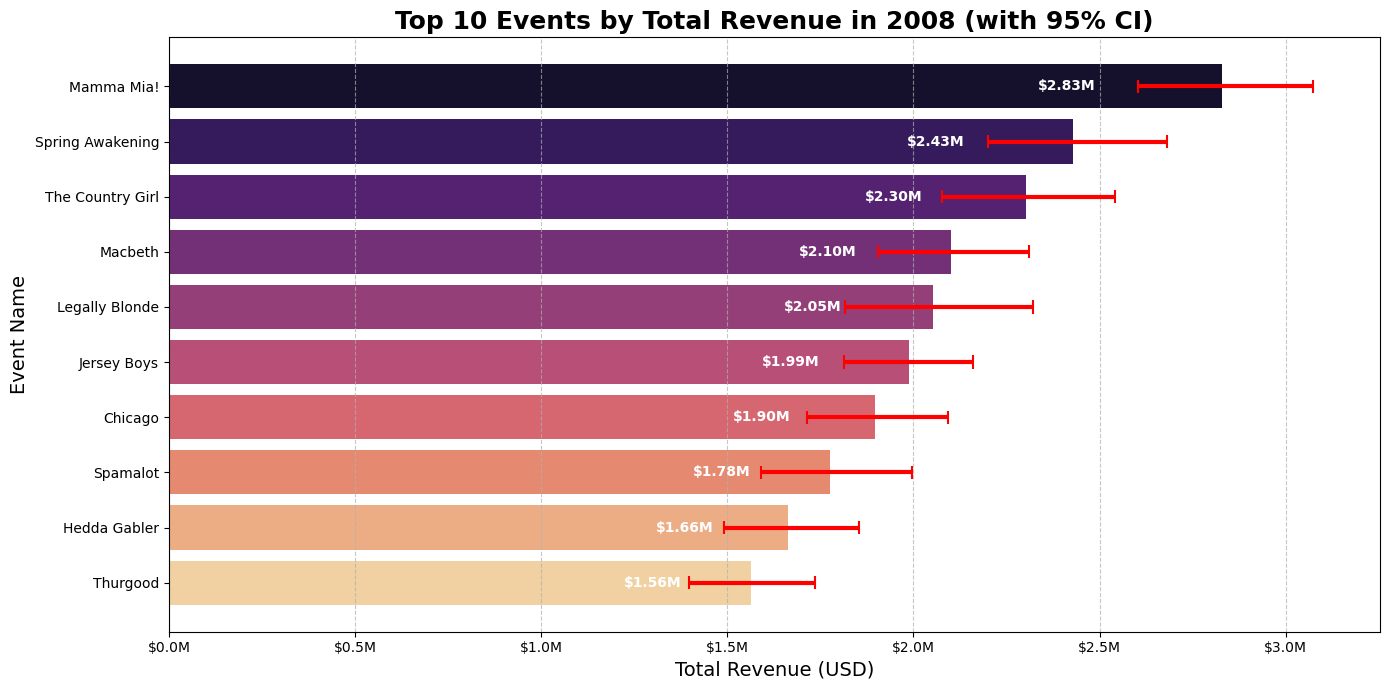

In [6]:
# Step 1: Aggregate total revenue for top 10 events
top_events = merged.groupby('eventname')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Compute 95% CI using the universal bootstrap function
ci_lowers, ci_uppers = [], []

for event in top_events['eventname']:
    event_data = merged[merged['eventname'] == event]
    _, ci_low, ci_high = bootstrap_ci(event_data, column='revenue', stat_func=np.sum)
    ci_lowers.append(ci_low)
    ci_uppers.append(ci_high)

# Step 3: Plotting
plt.figure(figsize=(14, 7))
bars = sns.barplot(data=top_events, x='revenue', y='eventname', palette='magma')

# Add revenue labels and CI lines
cap_height = 0.12  # vertical height of the cap

for i, (value, ci_low, ci_high) in enumerate(zip(top_events['revenue'], ci_lowers, ci_uppers)):
    # Revenue label
    plt.text(value * 0.88, i, f"${value/1e6:.2f}M", va='center', ha='right',
             fontsize=10, color='white', weight='bold')

    # Red horizontal CI line
    plt.hlines(y=i, xmin=ci_low, xmax=ci_high, color='red', linewidth=3)

    # Red vertical CI caps
    plt.vlines(x=ci_low, ymin=i - cap_height, ymax=i + cap_height, color='red', linewidth=1.5)
    plt.vlines(x=ci_high, ymin=i - cap_height, ymax=i + cap_height, color='red', linewidth=1.5)

# Final formatting
plt.title('Top 10 Events by Total Revenue in 2008 (with 95% CI)', fontsize=18, weight='bold')
plt.xlabel('Total Revenue (USD)', fontsize=14)
plt.ylabel('Event Name', fontsize=14)

# Format x-axis to millions
formatter = ticker.FuncFormatter(lambda x, pos: f'${x*1e-6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# X-axis config
max_revenue = top_events['revenue'].max()
plt.xlim(0, max_revenue * 1.15)
plt.xticks(np.arange(0, max_revenue * 1.2, 5e5))

# Grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis and Interpretation

This visualization highlights the revenue concentration within a select group of performances, illustrating how a few events capture a sizable portion of overall earnings. By using bootstrap-based 95% confidence intervals, we provide insight into the reliability of these revenue estimates.

Notably, while certain events appear to generate more revenue than others, some confidence intervals overlap, especially among mid-ranked events. This overlap suggests that apparent revenue differences may not be statistically significant. For example, while Spring Awakening slightly outranks The Country Girl, their intervals intersect—prompting caution before interpreting the difference as meaningful.

Including this layer of uncertainty helps us move beyond raw totals and toward more robust comparisons, especially when ranking events or informing financial decision-making.

---

### Limitations and Considerations

While effective in comparing total revenue, this figure does **not adjust for factors like the number of performances** or **ticket price variation**, which may bias results in favor of longer-running shows. Additionally, categories with fewer listings may have **wider confidence intervals**, affecting the precision of some estimates. Future work could normalize by show count or include ticket volume to provide a more nuanced view of per-show profitability.


======================================================================================================================


## Figure 2: Total Revenue by Event Category in 2008 (with 95% CI)
### Observational Summary
This chart presents the total aggregated revenue generated by each event category in 2008, with 95% confidence intervals derived from bootstrap resampling. The visualization highlights how categories performed overall in terms of financial contribution to the ticketing platform.

From this figure, Pop events dominated total revenue, earning approximately 149.54 million USD, significantly ahead of Plays (62.94 million USD) and Musicals (40.19 million USD). Opera ranked lowest among the categories analyzed, with revenue around $15.79M. The confidence intervals are relatively narrow due to the large sample size within each category, which naturally reduces uncertainty in total revenue estimates. Labels were also spaced for clarity to improve visual readability.



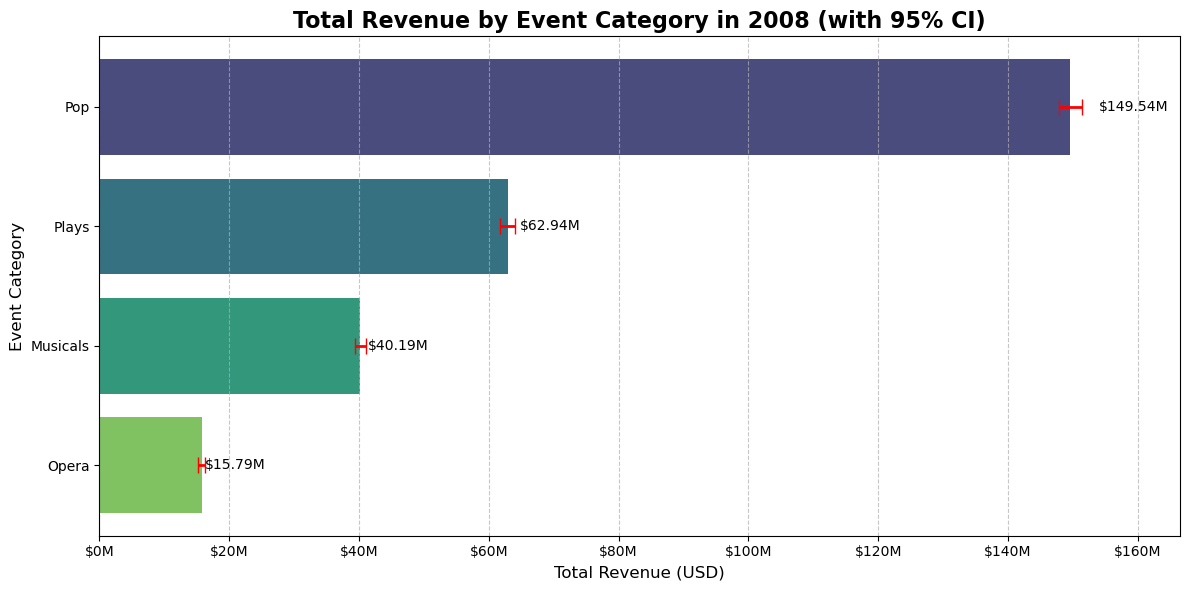

In [7]:
# Step 1: Get total revenue per category
category_totals = merged.groupby('catname')['revenue'].sum().sort_values(ascending=False)
category_names = category_totals.index.tolist()

# Step 2: Collect bootstrap CI results using the universal function
bootstrap_results = []

for cat in category_names:
    cat_data = merged[merged['catname'] == cat]
    mean, ci_lower, ci_upper = bootstrap_ci(cat_data, column='revenue', stat_func=np.sum)
    bootstrap_results.append({
        'catname': cat,
        'revenue': cat_data['revenue'].sum(),
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    })

category_df = pd.DataFrame(bootstrap_results).sort_values('revenue', ascending=False)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_df, x='revenue', y='catname', palette='viridis', ci=None)

# Add CI error bars
plt.errorbar(
    x=category_df['revenue'],
    y=np.arange(len(category_df)),
    xerr=[category_df['revenue'] - category_df['ci_lower'], category_df['ci_upper'] - category_df['revenue']],
    fmt='none',
    ecolor='red',
    capsize=6,
    linewidth=2,
    label='95% CI'
)

# Add revenue labels
for i, value in enumerate(category_df['revenue']):
    plt.text(value * 1.03, i, f"${value/1e6:.2f}M", va='center', ha='left', fontsize=10)

# Titles and labels
plt.title('Total Revenue by Event Category in 2008 (with 95% CI)', fontsize=16, weight='bold')
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Event Category', fontsize=12)

# Format x-axis in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'${x*1e-6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Extend x-axis for spacing
plt.xlim(0, category_df['ci_upper'].max() * 1.1)

# Grid and layout
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Analysis and Interpretation
This figure demonstrates a clear market imbalance across event types, with Pop performances generating more than twice the revenue of the next category. The addition of bootstrap confidence intervals strengthens interpretability by quantifying statistical uncertainty, even though variability remains low due to the large volume of transactions per category.

While the overall ranking is visually evident, the inclusion of confidence intervals ensures that these comparisons are statistically grounded. For instance, Plays and Musicals appear close in absolute revenue, and their confidence ranges confirm this proximity, reinforcing a more cautious interpretation of their relative performance.

By emphasizing both magnitude and precision, this visualization provides a more holistic understanding of revenue distribution, supporting better strategic decisions for stakeholders analyzing category performance.

---

## Limitations and Considerations
Although total revenue offers a valuable high-level comparison, it does not account for the number of events within each category. As a result, categories with more frequent listings (e.g., Pop) may appear more profitable due to sheer volume rather than per-event success. Additionally, confidence intervals, while narrow here, still depend on the representativeness of the data. Future analysis could explore revenue per event or per ticket sold to normalize comparisons and better capture efficiency or profitability per category.

======================================================================================================================

## Figure 3: Monthly Revenue per Ticket by Top Venues in 2008
### Observational Summary
This figure presents monthly average revenue per ticket across four major event hubs: New York City, Las Vegas, Los Angeles, and San Francisco. The chart highlights seasonal variation in ticket value, with cities like New York City and San Francisco exhibiting stable revenue per ticket throughout the year, while Las Vegas and Los Angeles show more pronounced month-to-month fluctuations. The plot is based on data aggregated from over 160,000 transactions, and bootstrap-based 95% confidence intervals were computed separately and summarized in a companion table.

From the table, New York City shows tightly clustered confidence intervals around a consistent mean (~640–665 USD), reflecting stable purchasing behavior. Las Vegas, in contrast, displays wider variability, with January reaching a mean of 748 USD but a much broader CI (446–1155 USD), indicating less reliability in that estimate. San Francisco demonstrates relatively high ticket revenue with wider CIs in months like February and March, suggesting fewer observations or greater price dispersion.



In [8]:
# Step 1: Get top 4 venues by total revenue
top_venues = merged.groupby('venuecity')['revenue'].sum().sort_values(ascending=False).head(4).index

# Step 2: Compute mean revenue per ticket with 95% CI using bootstrap
results = []

for venue in top_venues:
    for month in range(1, 13):
        subset = merged[(merged['venuecity'] == venue) & (merged['month'] == month)]
        if not subset.empty:
            mean, ci_low, ci_high = bootstrap_ci(
                subset,
                custom_stat=lambda df: (df['revenue'] / df['qtysold']).mean()
            )
            results.append({
                'Venue': venue,
                'Month': month,
                'Mean Revenue per Ticket': round(mean, 2),
                '95% CI Lower': round(ci_low, 2),
                '95% CI Upper': round(ci_high, 2)
            })

# Step 3: Convert to DataFrame and format
bootstrap_table = pd.DataFrame(results)

# Month mapping
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_map = {i+1: month_names[i] for i in range(12)}
bootstrap_table['Month'] = bootstrap_table['Month'].map(month_map)

# Order months
bootstrap_table['Month'] = pd.Categorical(
    bootstrap_table['Month'],
    categories=month_names,
    ordered=True
)

# Sort and reset index
bootstrap_table = bootstrap_table.sort_values(by=['Venue', 'Month'])
bootstrap_table.index = range(1, len(bootstrap_table) + 1)

# Display table (optional for debug)
bootstrap_table


,Venue,Month,Mean Revenue per Ticket,95% CI Lower,95% CI Upper
1,Las Vegas,January,742.69,461.94,1148.47
2,Las Vegas,February,534.80,464.57,623.42
3,Las Vegas,March,695.57,623.47,778.07
4,Las Vegas,April,699.39,626.55,779.47
5,Las Vegas,May,600.06,546.24,656.09
6,Las Vegas,June,641.71,570.12,721.90
7,Las Vegas,July,649.79,585.82,713.93
8,Las Vegas,August,656.43,582.11,735.34
9,Las Vegas,September,660.62,592.21,728.90
10,Las Vegas,October,689.26,615.45,772.56


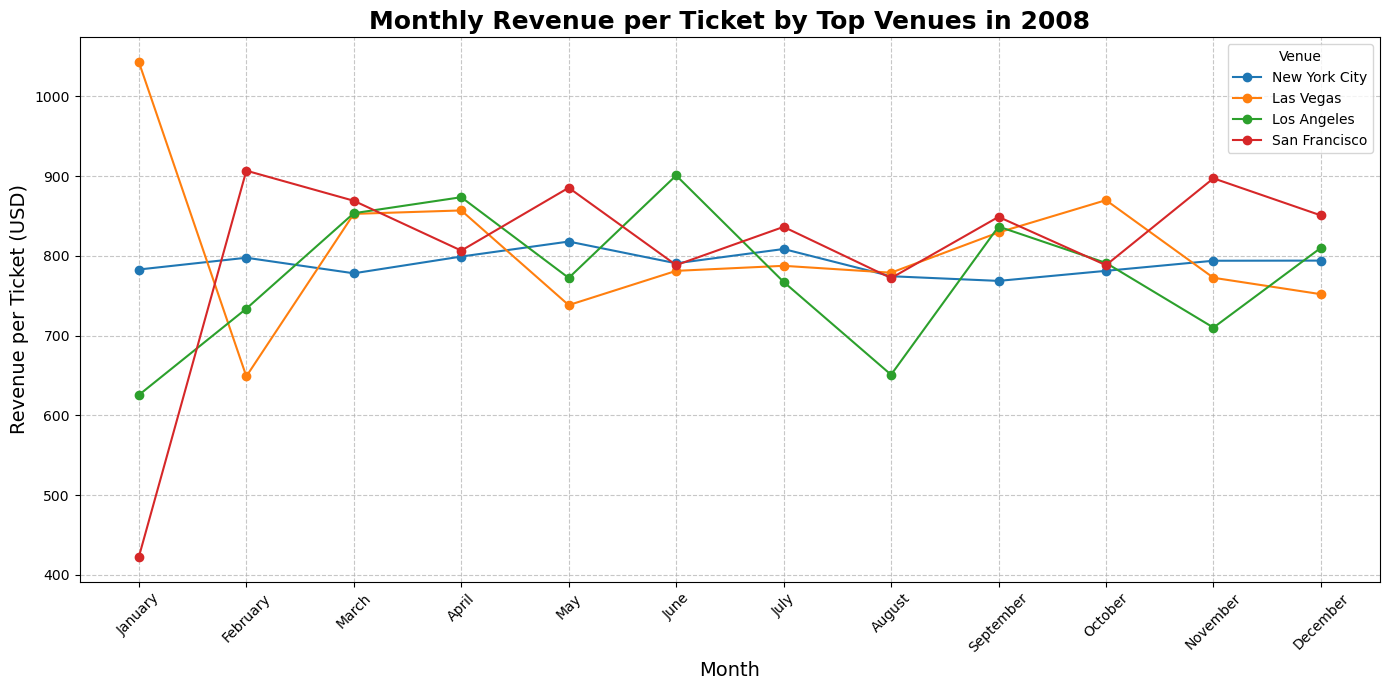

In [9]:
# Plot the trend lines using original monthly average revenue per ticket


# Aggregate monthly revenue per ticket
venue_monthly = merged.groupby(['venuecity', 'month']).agg({
    'revenue': 'sum',
    'qtysold': 'sum'
}).reset_index()

venue_monthly['revenue_per_ticket'] = venue_monthly['revenue'] / venue_monthly['qtysold']
venue_monthly = venue_monthly[venue_monthly['venuecity'].isin(top_venues)]
venue_monthly['month_name'] = venue_monthly['month'].map(month_map)

# Plot
plt.figure(figsize=(14, 7))
for venue in top_venues:
    data = venue_monthly[venue_monthly['venuecity'] == venue]
    plt.plot(data['month_name'], data['revenue_per_ticket'], marker='o', label=venue)

plt.title('Monthly Revenue per Ticket by Top Venues in 2008', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue per Ticket (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Venue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Analysis and Interpretation
The visualization and bootstrap results indicate that venue stability and pricing power vary significantly by location. New York City emerges as the most statistically reliable market, with tight intervals and steady performance. Meanwhile, cities like San Francisco and Las Vegas have wider intervals, especially in the early months, indicating either less predictable pricing or lower transaction volume.

Importantly, the bootstrapped confidence intervals (presented in the table rather than on the plot for visual clarity) offer insight into revenue estimate reliability. For instance, while Las Vegas shows high average revenue in March and April, the wide confidence bands advise caution in overinterpreting their lead over other cities. Conversely, cities with narrower bands like New York are more trustworthy for performance benchmarking.

---

## Limitations and Considerations
One key limitation is that this analysis does not control for event type within each venue. Cities may host different mixes of shows (e.g., musicals vs. pop concerts), which can skew revenue upward or downward. Another constraint is the lack of volume adjustment—venues with more frequent events may have revenue diluted across lower-cost offerings. Future work could stratify this data further by event category and seat count to normalize for venue capacity and event diversity, providing a richer comparison of market behavior.

======================================================================================================================

## Figure 4: Top 5 Cities by Total Revenue in 2008 (with 95% CI)
### Observational Summary
To identify regional market strength, we aggregated total ticket revenue for each city and plotted the top five. The figure below displays the most lucrative urban centers for ticket sales in 2008, including 95% confidence intervals obtained through bootstrap resampling.

From this chart, New York City clearly dominates, generating approximately 84 million USD in revenue. It far outpaces the second-ranked city, Las Vegas, which recorded around 10 million USD, followed closely by Los Angeles, San Francisco, and Chicago. This suggests that certain metropolitan hubs are consistently high-performing ticket markets. The confidence intervals for all cities are relatively narrow, reinforcing the reliability of these revenue estimates.


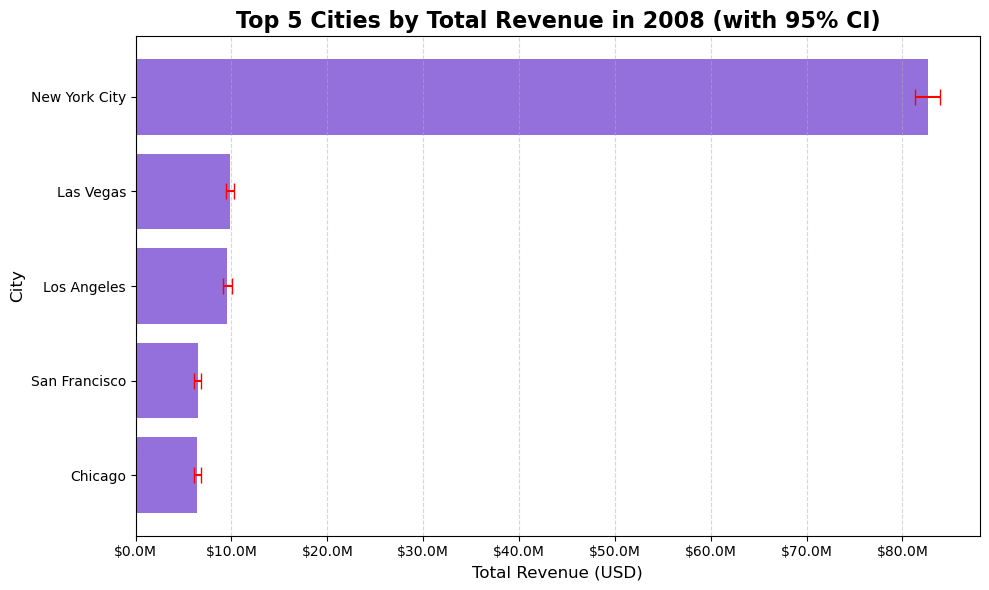

In [10]:
# Step 1: Identify top 5 cities by total revenue
top5_cities = merged.groupby('venuecity')['revenue'].sum().sort_values(ascending=False).head(5).index

# Step 2: Filter dataset for top cities
top5_data = merged[merged['venuecity'].isin(top5_cities)]

# Step 3: Apply bootstrap using universal function
results = []
for city in top5_cities:
    city_data = top5_data[top5_data['venuecity'] == city]
    mean, ci_low, ci_high = bootstrap_ci(city_data, column='revenue', stat_func=np.sum)
    results.append({
        'City': city,
        'Mean Revenue': mean,
        'CI Lower': ci_low,
        'CI Upper': ci_high
    })

# Step 4: Create DataFrame
ci_df = pd.DataFrame(results).sort_values(by='Mean Revenue')

# Step 5: Plot with 95% CI bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    ci_df['City'],
    ci_df['Mean Revenue'],
    xerr=[ci_df['Mean Revenue'] - ci_df['CI Lower'], ci_df['CI Upper'] - ci_df['Mean Revenue']],
    color='mediumpurple',
    ecolor='red',
    capsize=6
)

# Formatting
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
ax.set_title('Top 5 Cities by Total Revenue in 2008 (with 95% CI)', fontsize=16, weight='bold')
ax.set_xlabel('Total Revenue (USD)', fontsize=12)
ax.set_ylabel('City', fontsize=12)
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Analysis and Interpretation
This visualization reveals that revenue generation is highly concentrated in a small number of urban areas, with New York City alone accounting for a significant share of total earnings. The use of bootstrap-based 95% confidence intervals ensures that this finding is statistically robust and not the result of sampling variance.

Notably, although Las Vegas and Los Angeles have similar revenue totals, the overlapping confidence intervals indicate that their performance is not meaningfully different at a 95% confidence level. In contrast, New York City's margin of superiority is well outside the confidence range of the others, validating its top-tier status.

---

## Limitations and Considerations
While this chart effectively highlights the cities generating the most revenue, it does not account for potential confounding variables such as population size, number of venues, or average ticket price. As a result, cities with larger infrastructure may appear disproportionately successful. Future analyses could normalize revenue by population, number of events, or venue capacity to assess market efficiency and demand saturation more precisely.

======================================================================================================================

## Figure 5: Ticket Sales Distribution by Price Range in 2008 (with 95% CI)
### Observational Summary
To understand consumer spending behavior, we grouped ticket sales into six price ranges and calculated the total quantity sold per bin. The chart below visualizes this distribution and includes 95% confidence intervals generated using bootstrap resampling.

From the figure, the 500–1000 USD range stands out as the most successful, with an average of 94,759 tickets sold, significantly surpassing all other categories. This suggests that consumers were generally willing to pay a premium for higher-value events. The next most active segment was the 1000+ USD range, averaging 73,454 tickets sold, indicating strong demand even at very high prices. Lower price bands such as 0–100 USD and 100–200 USD lagged behind, selling roughly 25,116 and 40,553 tickets respectively. These findings imply that mid-to-high ticket pricing may align better with consumer expectations in the 2008 event landscape.

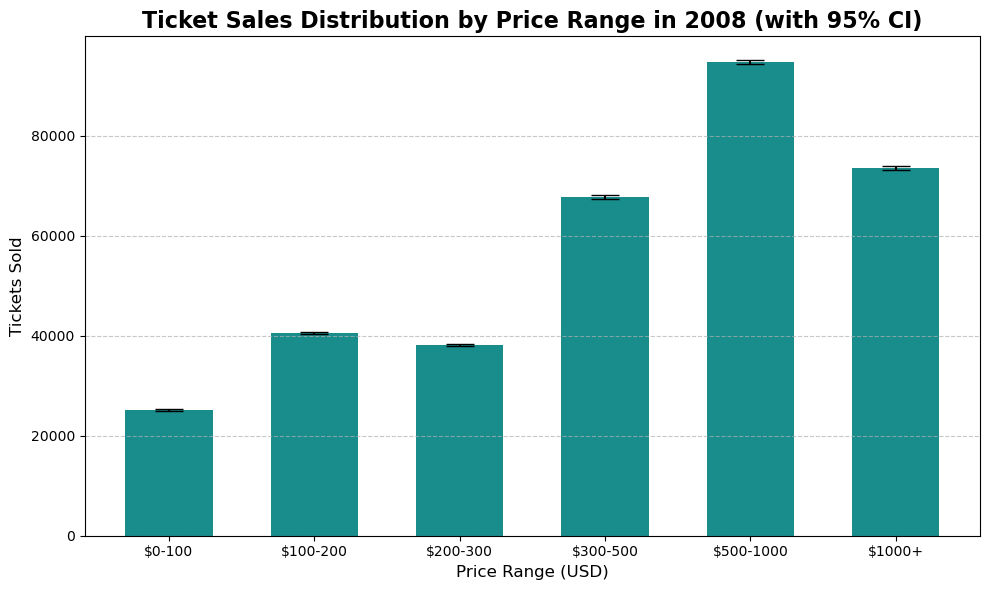

In [11]:
# Define price bins and labels
price_bins = [0, 100, 200, 300, 500, 1000, float('inf')]
price_labels = ['$0-100', '$100-200', '$200-300', '$300-500', '$500-1000', '$1000+']

# Create a new column for price range
merged['price_range'] = pd.cut(merged['pricepaid'], bins=price_bins, labels=price_labels)

# Apply bootstrap for each price range
bootstrap_results = []
for label in price_labels:
    subset = merged[merged['price_range'] == label]
    mean, ci_low, ci_high = bootstrap_ci(subset, column='qtysold', stat_func=np.sum)
    bootstrap_results.append({
        'Price Range': label,
        'Mean Tickets Sold': round(mean, 0),
        '95% CI Lower': round(ci_low, 0),
        '95% CI Upper': round(ci_high, 0)
    })

# Create DataFrame
bootstrap_df = pd.DataFrame(bootstrap_results)

# Plotting with error bars
plt.figure(figsize=(10, 6))
plt.bar(
    bootstrap_df['Price Range'],
    bootstrap_df['Mean Tickets Sold'],
    yerr=[
        bootstrap_df['Mean Tickets Sold'] - bootstrap_df['95% CI Lower'],
        bootstrap_df['95% CI Upper'] - bootstrap_df['Mean Tickets Sold']
    ],
    capsize=10,
    width=0.6,
    color='teal',
    alpha=0.9
)

plt.title('Ticket Sales Distribution by Price Range in 2008 (with 95% CI)', fontsize=16, weight='bold')
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Tickets Sold', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
bootstrap_results = []
for price_range in price_labels:
    group_data = merged[merged['price_range'] == price_range]
    mean, ci_low, ci_high = bootstrap_ci(group_data, column='qtysold', stat_func=np.sum)
    bootstrap_results.append({
        'Price Range': price_range,
        'Mean Tickets Sold': round(mean, 0),
        '95% CI Lower': round(ci_low, 0),
        '95% CI Upper': round(ci_high, 0)
    })

# Create and display the table
bootstrap_table = pd.DataFrame(bootstrap_results)
bootstrap_table

,Price Range,Mean Tickets Sold,95% CI Lower,95% CI Upper
0,$0-100,25114.0,24943.0,25282.0
1,$100-200,40551.0,40279.0,40825.0
2,$200-300,38152.0,37912.0,38423.0
3,$300-500,67770.0,67420.0,68109.0
4,$500-1000,94759.0,94423.0,95102.0
5,$1000+,73467.0,73070.0,73878.0


## Analysis and Interpretation
The addition of bootstrap-based 95% confidence intervals provides statistical reliability to the observed differences. Notably, the intervals are very narrow, suggesting high certainty around the estimated totals and reinforcing the strength of the results. While some variation exists across bins, the dominant performance of the 500–1000 USD range remains statistically significant and unlikely due to random fluctuation.

These results can inform pricing strategies for event organizers by identifying segments where demand remains robust despite higher costs. The insight also aligns with earlier findings in this analysis regarding revenue concentration in premium offerings.

---

## Limitations and Considerations
While informative, the current bin structure is relatively broad. For example, the 500–1000 USD category could include very different consumer behaviors at either end of the range. Future analyses could refine bin granularity, segmenting into smaller price intervals (e.g., 500–700 USD, 700–900 USD) to better capture nuanced pricing sensitivities. Additionally, connecting price levels with event types or venue characteristics could reveal why certain segments outperform others.

======================================================================================================================

## Figure 6: Monthly Revenue Trends by Event Category in 2008 (with 95% CI)
### Observational Summary
This figure presents a month-by-month breakdown of total ticket revenue for each major event category throughout 2008, with shaded areas denoting 95% bootstrap confidence intervals. Pop events show a marked seasonal peak from March through June, reaching their highest revenue levels in late spring. In contrast, Plays and Musicals maintain more stable, flatter revenue trends year-round, while Opera remains consistently lower in total earnings.




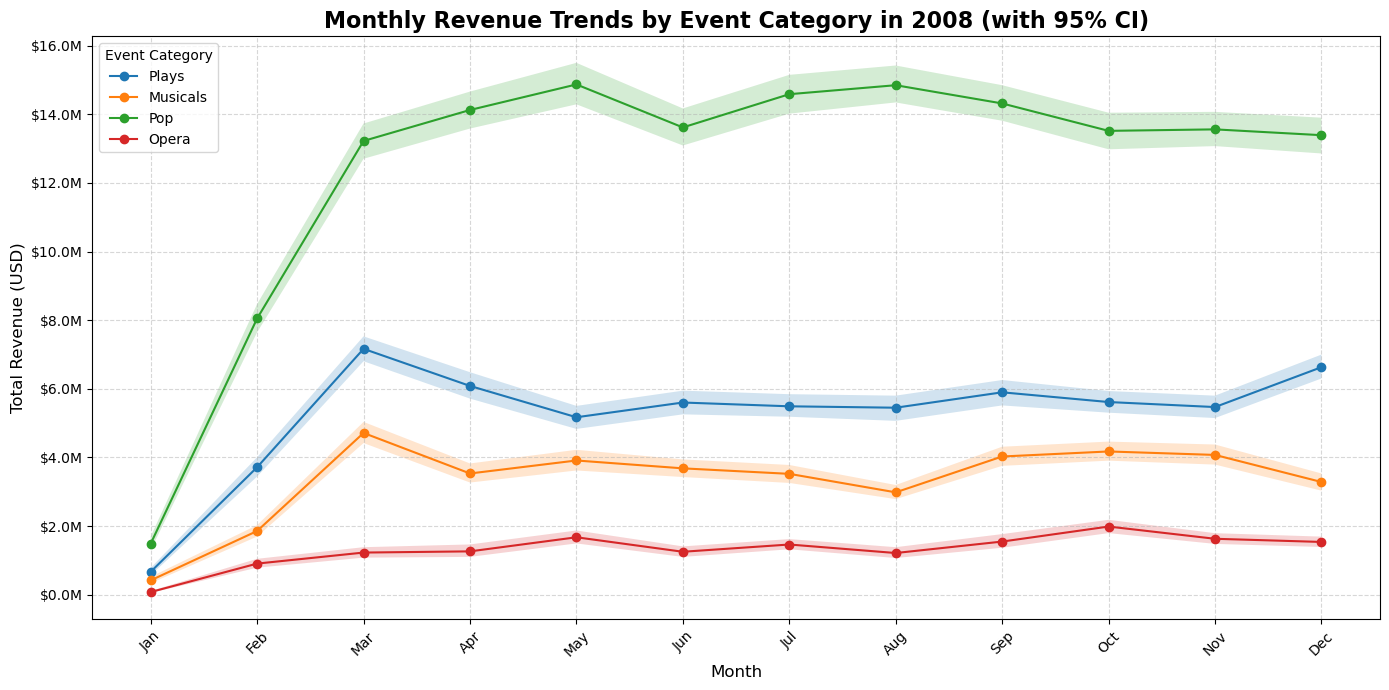

In [13]:
# ✅ Set up plot
fig, ax = plt.subplots(figsize=(14, 7))

# Get unique event categories
categories = merged['catname'].unique()

# Plot each category with CI shading
for category in categories:
    means, lower_ci, upper_ci = [], [], []

    for month in range(1, 13):
        monthly_data = merged[(merged['catname'] == category) & (merged['month'] == month)]
        if not monthly_data.empty:
            mean, ci_low, ci_high = bootstrap_ci(monthly_data, column='revenue', stat_func=np.sum)
            means.append(mean / 1e6)
            lower_ci.append(ci_low / 1e6)
            upper_ci.append(ci_high / 1e6)
        else:
            means.append(0)
            lower_ci.append(0)
            upper_ci.append(0)

    # Plot mean revenue line
    ax.plot(range(1, 13), means, marker='o', label=category)

    # Plot CI shaded region
    ax.fill_between(range(1, 13), lower_ci, upper_ci, alpha=0.2)

# ✅ Final formatting
ax.set_title('Monthly Revenue Trends by Event Category in 2008 (with 95% CI)', fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Revenue (USD)', fontsize=12)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:.1f}M'))

ax.legend(title='Event Category')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Analysis and Interpretation
The visualization reveals a distinct seasonal pattern in Pop events, suggesting concentrated consumer interest or scheduling during specific months. The use of confidence intervals adds statistical reliability to these observations, showing that Pop’s dominance during the spring is not due to random variation. While Musicals and Plays follow less volatile paths, their overlap in confidence bands indicates that differences between them may not be statistically significant at several points in the year. The plot effectively illustrates both magnitude and uncertainty across categories and time.

---

## Limitations and Considerations
A key limitation of this figure is that it aggregates total revenue without adjusting for the number of performances or events per category each month. As such, peaks in Pop may be driven by a higher frequency of events rather than higher per-event earnings. Additionally, the variability in ticket prices and venue sizes across categories is not reflected. Future extensions could normalize revenue by event count or ticket volume to provide more granular insight into month-to-month and category-level performance.



======================================================================================================================

---

## Step 7: Final Interpretation, Limitations, and Future Work

Overall, the project findings indicate that Pop events dominate revenue generation, New York City stands as the most lucrative event market, and mid-to-premium ticket prices between 500 USD and 1000 USD  drive the highest sales volume. Bootstrapping confirmed the stability of revenue per ticket averages across categories, though smaller categories exhibited wider confidence intervals due to limited data. Nevertheless, limitations such as the absence of normalization by event count, price bin granularity, and city size were recognized. Future work could incorporate more sophisticated modeling approaches, such as time series forecasting or predictive modeling, to anticipate seasonal peaks and revenue performance based on event and city features.

---

## Contribution Report

Each member of Group 4 contributed significantly and collaboratively to the success of this project. Jameel Muallim led the merging of datasets and the development of the bootstrap resampling procedures, ensuring that uncertainty in revenue estimates was properly quantified. Mohana Aljabri focused extensively on data cleaning and feature engineering, constructing critical variables such as revenue, price ranges, and month mappings that enabled deeper analysis. Hesham Alshahrani produced all the visualizations, carefully refined the figure formatting to meet publication standards, and drafted detailed interpretation and limitation discussions for each result. Together, the group members conducted reviews of all sections to maintain cohesion and clarity throughout the notebook.

---
